In [1]:
import pandas as pd
import glob
import numpy as np
import json
import torch
import sys
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [2]:
data_embedding = []
path = 'C:\\Users\\Asus\\Desktop\\dataset_2021'
input_dir = path+'\\document_embedding_train'
data_path = glob.glob(input_dir+'\\*.pt')

In [3]:
len(data_path)

11200

In [4]:
data = []
target = []
for file_path in data_path :
    embedding = torch.load(file_path)
    document_id = file_path[len(input_dir)+16 : -3]
    label_path = path + '\\train' + '\\truth-problem-' + document_id + '.json' # complete path to truth files
    with open(label_path, 'r') as f:
        label = json.load(f)['multi-author']
    if embedding == None or label == None:
        continue
    data.append(embedding)
    target.append(label)
    

In [5]:
len(data), type(data), data[0].shape, len(target)

(11200, list, torch.Size([1, 768]), 11200)

In [6]:
tensor_data = []
for tensor in data:
    for x in tensor:
        tensor_data.append(x)
        

In [7]:
len(tensor_data), tensor_data[0].shape

(11200, torch.Size([768]))

In [8]:
df = pd.DataFrame(tensor_data).astype('float32')

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,48.569702,-17.362169,-9.714126,-28.723328,-41.559948,-6.309685,16.162344,13.519107,-7.103517,17.530294,...,-6.664738,-18.813648,-25.738703,-22.280996,-49.228119,-28.433870,-20.185915,24.349495,0.292360,69.769142
1,54.299587,-4.942529,-12.176182,-13.921281,-53.492870,-17.085840,6.209059,21.906782,-10.006556,14.018012,...,-37.134106,-33.647846,-46.591885,-18.392845,-50.865005,-42.762497,-20.296873,32.140991,3.492751,86.901741
2,87.403229,6.573958,-12.802128,-54.586388,-49.575314,-7.973675,3.261373,22.550192,-15.457679,11.507257,...,-46.006382,-0.368157,-40.124931,-27.411226,-56.107365,-62.761398,-16.050732,27.819487,5.714669,89.394798
3,63.662472,-7.735876,-15.571009,-40.632141,-38.176319,-12.960984,20.593971,20.197847,-15.058145,0.314267,...,-30.427574,-12.465148,-26.423576,-21.276670,-53.978859,-28.301085,0.308761,34.662777,7.055675,75.487350
4,57.109364,3.616708,-10.890131,-26.081463,-38.774261,-17.888687,14.667863,18.861799,-13.726034,16.981590,...,-33.337887,-21.553514,-31.702682,-16.363527,-52.851925,-45.908894,-1.008760,20.743292,6.228442,86.814713


Counter({1: 8400, 0: 2800})


Text(0.5, 1.0, '0 :Single author and 1: Multi-authors')

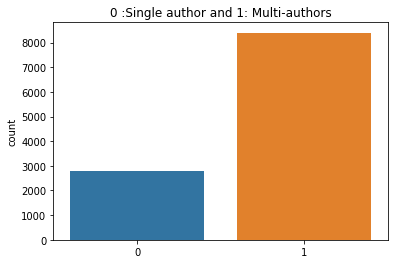

In [10]:
from collections import Counter
print(Counter(target) )
chart = sns.countplot(target)
plt.title("0 :Single author and 1: Multi-authors")

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 42)

In [12]:
len(x_train), len(x_test), len(y_train), len(y_test) 

(8960, 2240, 8960, 2240)

In [13]:
def plot_prediction(clf, x_test, y_test):
    from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
    from matplotlib import pyplot as plt
    confusion_mat = plot_confusion_matrix(clf, x_test, y_test , values_format= '.5g' )
    confusion_mat.ax_.set_title('Confusion Matrix ', color = 'w')
    plt.xlabel('Predicted Label', color = 'w')
    plt.ylabel('True Label ', color = 'w')
    plt.show()
    

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( random_state=0, n_estimators=150, max_features = 'log2')
model.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=150, random_state=0)

0.7602678571428572
              precision    recall  f1-score   support

           0       0.65      0.15      0.24       577
           1       0.77      0.97      0.86      1663

    accuracy                           0.76      2240
   macro avg       0.71      0.56      0.55      2240
weighted avg       0.74      0.76      0.70      2240



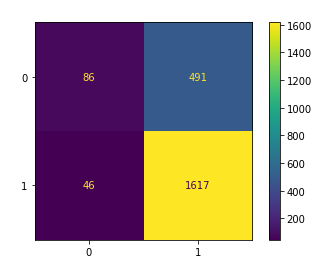

In [15]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred) )
plot_prediction(model, x_test, y_test)

# With class_wight = 'balanced'

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( random_state=0, n_estimators=150, max_features = 'log2', class_weight='balanced')
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=150, random_state=0)

0.7455357142857143
              precision    recall  f1-score   support

           0       0.61      0.03      0.07       577
           1       0.75      0.99      0.85      1663

    accuracy                           0.75      2240
   macro avg       0.68      0.51      0.46      2240
weighted avg       0.71      0.75      0.65      2240



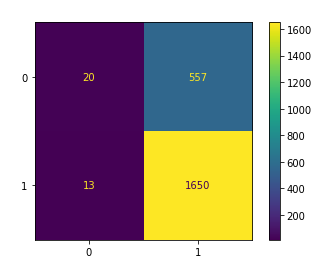

In [17]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred) )
plot_prediction(model, x_test, y_test)

# Oversampling

In [18]:
X = df
X['labels'] = target


In [19]:
class_count_1, class_count_0 =X.labels.value_counts()
class_count_1, class_count_0

(8400, 2800)

In [20]:
df_class_0 = X[ X['labels'] == 0]
df_class_1 = X[ X['labels'] == 1]
class_0_over = df_class_0.sample(n=class_count_1, replace=True)

In [21]:
X = pd.concat([df_class_1, class_0_over], axis=0)
X = X.sample(frac=1)
y = X['labels']
X.drop('labels', axis=1, inplace=True)

Counter({1: 8400, 0: 8400})


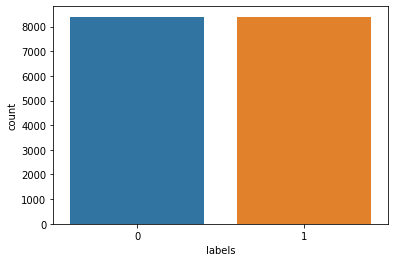

In [22]:
print(Counter(y))
sns.countplot(y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( random_state=0, n_estimators=150, max_features = 'log2')
model.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=150, random_state=0)

0.9383928571428571
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1710
           1       0.94      0.94      0.94      1650

    accuracy                           0.94      3360
   macro avg       0.94      0.94      0.94      3360
weighted avg       0.94      0.94      0.94      3360



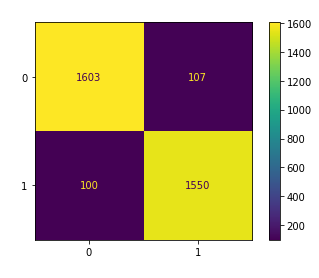

In [25]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred) )
plot_prediction(model, x_test, y_test)

#  Here we got some nice result. But it is false result. Why? As I did oversampling and then splited data for training, testing.
# Now the testing and training data have some common values due to oversampling and when these values seen by model it predicts 
# correct output as the model is already seen those values.

In [26]:
validation_data = []
validation_label = []
path = 'C:\\Users\\Asus\\Desktop\\dataset_2021'
input_dir = path+'\\validation_embedding\\document_embedding'
data_path = glob.glob(input_dir+'\\*.pt')
len(data_path)

2400

In [27]:
for file_path in data_path :
    tensor_data = torch.load(file_path)
    document_id = file_path[len(input_dir)+20 : -3]
    validation_data.append(tensor_data)
    file_path_label = path + '\\validation'+ '\\truth-problem-' + document_id + '.json'
    with open(file_path_label) as f :
        truth_document = json.load(f)
        validation_label.append(truth_document['multi-author'])

In [28]:
len(validation_data), len(validation_label)

(2400, 2400)

In [29]:
validation_tensor_data = []
for tensor in validation_data:
    for x in tensor:
        validation_tensor_data.append(x)
x_validation = pd.DataFrame(validation_tensor_data ).astype('float32')
y_validation = np.array(validation_label)

In [30]:
x_validation.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,98.925003,-20.690702,-7.349600,-58.511997,-79.852928,-2.918259,6.939056,31.152529,-31.365992,28.577959,...,-46.538914,-32.252941,-64.477089,10.512039,-29.024473,-93.140717,8.095277,-20.641806,30.447838,133.148788
1,41.945354,-6.116551,-15.695839,-16.173857,-43.146179,-31.354801,10.100378,30.811821,-20.552214,26.072079,...,-24.913904,-14.608386,-20.966810,-0.895891,-66.475014,-36.553539,-13.367286,32.645954,13.604811,76.203850
2,70.658539,-8.729010,15.945090,-31.785746,-72.124313,-18.763790,18.305937,37.210369,-20.847904,5.121190,...,-35.255714,-40.239029,-19.377146,-20.653151,-69.061417,-50.373894,1.328928,58.495934,3.589922,105.002892
3,82.424141,4.661307,-21.980148,-80.448898,-62.228207,-20.745144,25.873028,39.730022,-11.552150,5.011914,...,-25.485615,-15.884963,-55.525234,-10.206033,-63.214714,-65.609467,-5.953705,29.932226,-9.209470,88.154953
4,68.334763,-5.011245,-5.095279,-17.261980,-49.249889,-22.586538,14.777707,25.782087,-27.420216,34.442551,...,-32.934231,-15.761954,-25.091475,-22.419548,-68.271133,-53.148865,-5.267869,27.147058,17.379412,100.555199


0.74625
              precision    recall  f1-score   support

           0       0.48      0.18      0.26       600
           1       0.77      0.94      0.85      1800

    accuracy                           0.75      2400
   macro avg       0.63      0.56      0.55      2400
weighted avg       0.70      0.75      0.70      2400



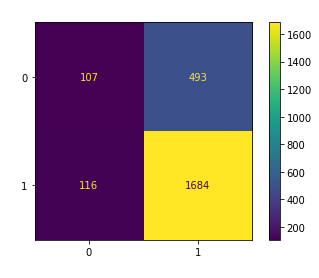

In [31]:
y_pred = model.predict(x_validation)
accuracy = accuracy_score(y_validation, y_pred)
print(accuracy)
print(classification_report(y_validation, y_pred) )
plot_prediction(model, x_validation, y_validation)